In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#from heatmap import heatmap, corrplot

In [4]:
data=pd.read_csv("AUD_CAD.csv",index_col="Date")

#   BETTER CORRELATION

In [111]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    inst_name=kwargs["instrument_name"]
    del kwargs["instrument_name"]
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'xlabel', 'ylabel'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=30, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    ax.set_title("Correaltion of "+inst_name)
    ax.set_xlabel(kwargs.get('xlabel', ''))
    ax.set_ylabel(kwargs.get('ylabel', ''))

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s',instrument_name="instrument"):
    corr = pd.melt(data.reset_index(), id_vars='index').replace(np.nan, 0)
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale,
        instrument_name=instrument_name
    )

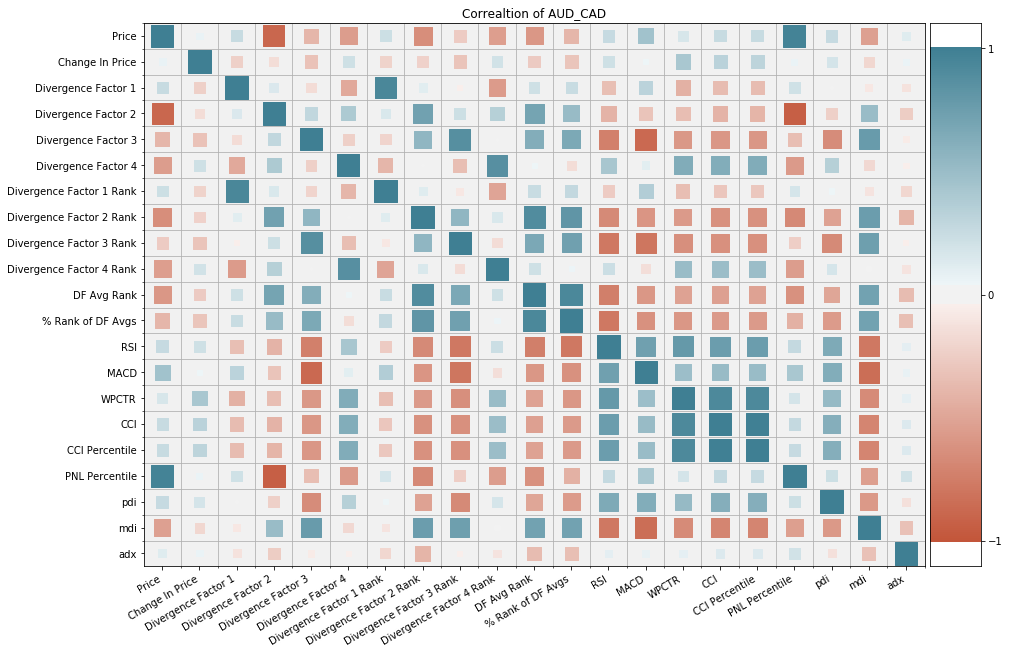

In [112]:
plt.figure(figsize=(15, 10))
corrplot(data.corr(), size_scale=500,instrument_name="AUD_CAD")
plt.savefig("Better.png")

# Predictive Power Score

In [113]:

import ppscore as pps

In [132]:
def heatmap(df,instrument_name):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix of "+instrument_name)
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [125]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

In [126]:
matrix = pps.matrix(data)

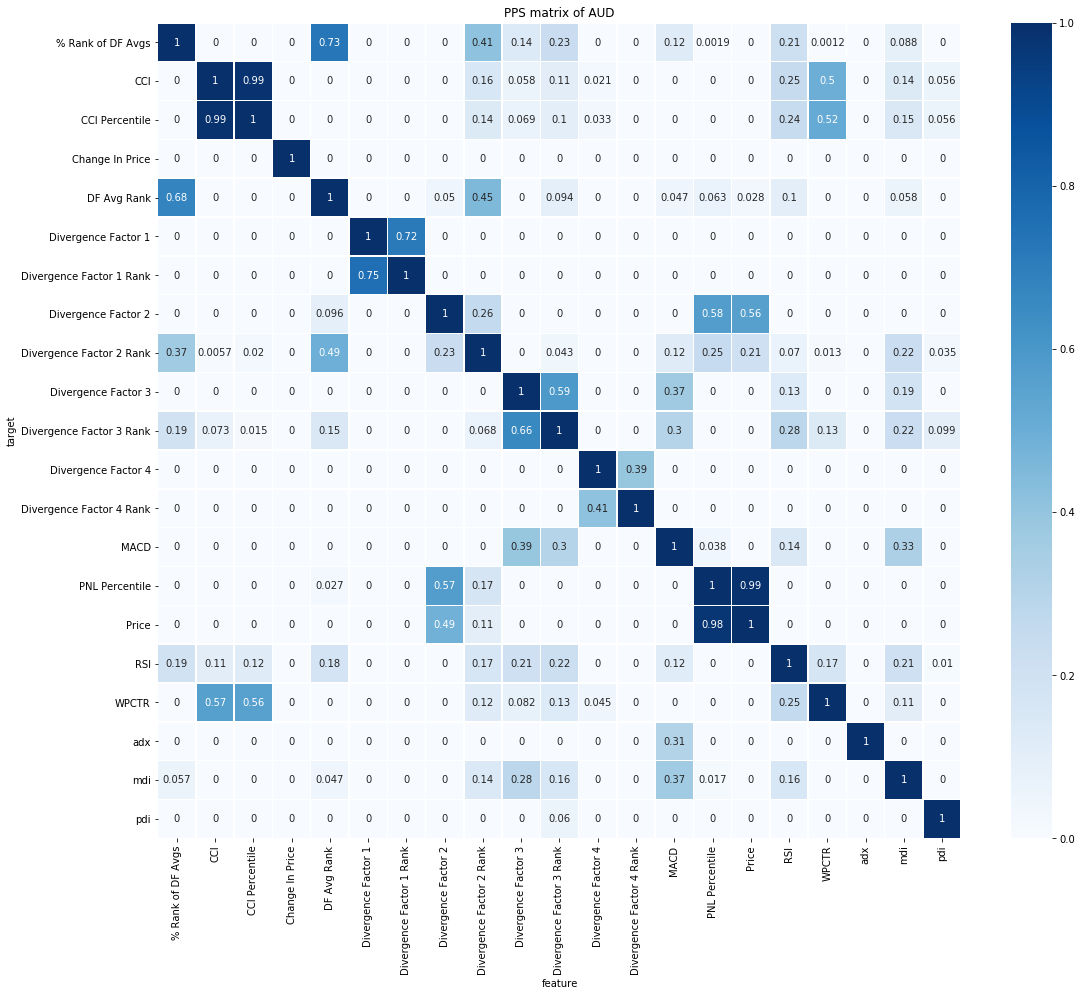

In [131]:
plt.figure(figsize=(18, 15))
heatmap(matrix,"AUD")
plt.savefig("PPS")


# Identifying Outliers

In [19]:
data.columns

Index(['Price', 'Change In Price', 'Divergence Factor 1',
       'Divergence Factor 2', 'Divergence Factor 3', 'Divergence Factor 4',
       'Divergence Factor 1 Rank', 'Divergence Factor 2 Rank',
       'Divergence Factor 3 Rank', 'Divergence Factor 4 Rank', 'DF Avg Rank',
       '% Rank of DF Avgs', 'RSI', 'MACD', 'WPCTR', 'CCI', 'CCI Percentile',
       'PNL Percentile', 'pdi', 'mdi', 'adx'],
      dtype='object')

In [20]:
d1=data.loc[:,"% Rank of DF Avgs"].copy()

In [21]:
d1

Date
2019-03-07 17:00:00+00:00    1.000000
2019-03-08 17:00:00+00:00    0.000000
2019-03-10 17:00:00+00:00    0.500000
2019-03-11 17:00:00+00:00    0.333333
2019-03-12 17:00:00+00:00    0.750000
                               ...   
2020-08-14 16:00:00+00:00    0.144124
2020-08-16 16:00:00+00:00    0.137168
2020-08-17 16:00:00+00:00    0.128035
2020-08-18 16:00:00+00:00    0.101322
2020-08-19 16:00:00+00:00    0.329670
Name: % Rank of DF Avgs, Length: 456, dtype: float64

In [22]:
d1=pd.DataFrame(d1)

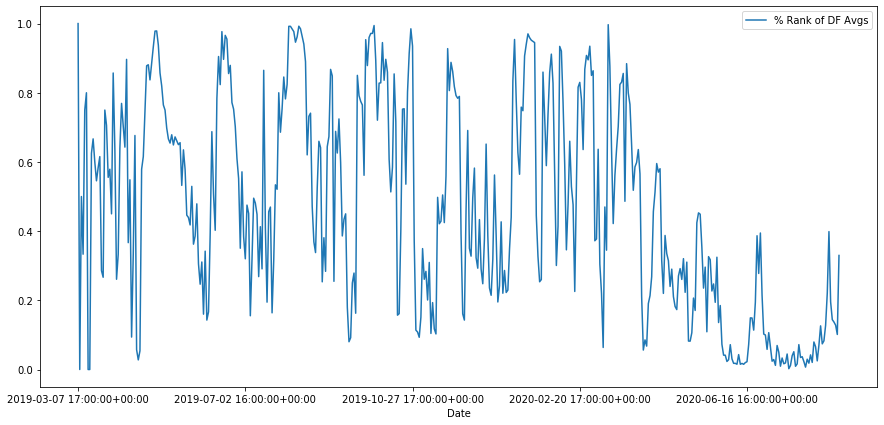

In [34]:

d1.plot(figsize=(15, 7))

In [65]:
d2=d1.iloc[-90:,:]

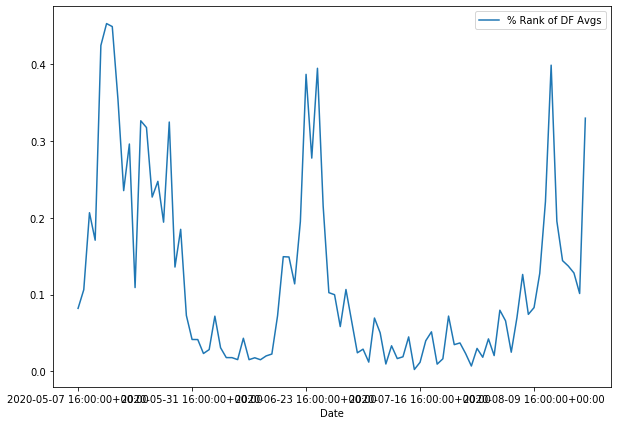

In [66]:
d2.plot(figsize=(10,7))

In [41]:
d2['simple_rtn']=d2["% Rank of DF Avgs"].pct_change()
d2.head()

C:\Users\Mahad Khan\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,% Rank of DF Avgs,simple_rtn
Date,,
2020-05-07 16:00:00+00:00,0.081967,NaN
2020-05-08 16:00:00+00:00,0.106267,0.296458
2020-05-10 16:00:00+00:00,0.206522,0.943423
2020-05-11 16:00:00+00:00,0.170732,-0.173299
2020-05-12 16:00:00+00:00,0.424324,1.485328


In [42]:
d2[['mean', 'std']] = d2['simple_rtn'].ewm(span=21) \
                               .agg(['mean', 'std'])
d2.head()

C:\Users\Mahad Khan\.conda\envs\ml\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,% Rank of DF Avgs,simple_rtn,mean,std
Date,,,,
2020-05-07 16:00:00+00:00,0.081967,NaN,NaN,NaN
2020-05-08 16:00:00+00:00,0.106267,0.296458,0.296458,NaN
2020-05-10 16:00:00+00:00,0.206522,0.943423,0.635344,0.457473
2020-05-11 16:00:00+00:00,0.170732,-0.173299,0.339737,0.572567
2020-05-12 16:00:00+00:00,0.424324,1.485328,0.668283,0.753168


In [43]:
d2.dropna(inplace=True)

C:\Users\Mahad Khan\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


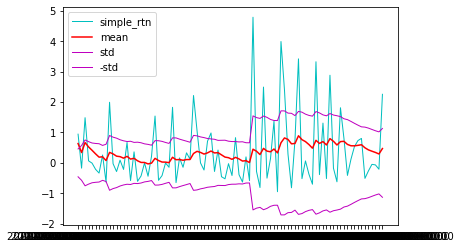

In [45]:
fig, ax = plt.subplots()
ax.plot(d2.index, d2['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d2.index, d2['mean'], label= 'mean',c='r')
ax.plot(d2.index, d2[ 'std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d2.index, -d2['std'],label='-std', linestyle='-',c='m', lw=1)
ax.legend(loc='upper left') 

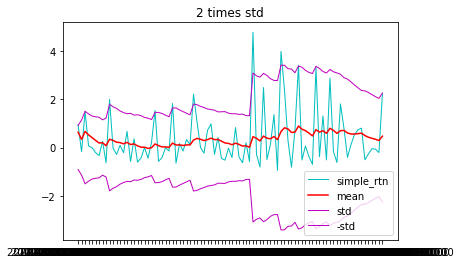

In [46]:
fig, ax = plt.subplots()
ax.plot(d2.index, d2['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d2.index, d2['mean'], label= 'mean',c='r')
ax.plot(d2.index, 2*d2['std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d2.index, -2*d2['std'],label='-std', linestyle='-',c='m', lw=1)
ax.set_title('2 times std')
ax.legend(loc='lower right')

In [54]:
def get_outliers(df, n_sigmas=2):
    '''
    df: the DataFrame
    mu: mean
    sigmas: std
    n_sigmas: number of std as boundary
    '''
    x = df['simple_rtn']
    mu = df['mean']
    sigma = df['std']
    
    if (x > mu+n_sigmas*sigma) | (x<mu-n_sigmas*sigma):
        return 1
    else:
        return 0
  

In [55]:
d2['outlier']=d2.apply(get_outliers, axis=1)
outliers = d2.loc[d2['outlier'] == 1, ['simple_rtn']]
outliers.head()

C:\Users\Mahad Khan\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,simple_rtn
Date,
2020-06-17 16:00:00+00:00,2.214187
2020-07-07 16:00:00+00:00,4.786124


In [56]:
condition = (d2['simple_rtn'] > d2['mean'] + d2['std'] * 2) | (d2['simple_rtn'] < d2['mean'] - d2['std']* 2) 
d2['outliers'] = np.where(condition, 1, 0)

C:\Users\Mahad Khan\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2020-06-17 16:00:00+00:00 to 2020-07-07 16:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simple_rtn  2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes


In [79]:
outliers=outliers.reset_index()

In [77]:
d2=d2.reset_index()

In [90]:
d2.tail(40)

,Date,% Rank of DF Avgs
50,2020-07-05 16:00:00+00:00,0.028846
51,2020-07-06 16:00:00+00:00,0.011990
52,2020-07-07 16:00:00+00:00,0.069378
53,2020-07-08 16:00:00+00:00,0.050119
54,2020-07-09 16:00:00+00:00,0.009524
55,2020-07-10 16:00:00+00:00,0.033254
56,2020-07-12 16:00:00+00:00,0.016588
57,2020-07-13 16:00:00+00:00,0.018913
58,2020-07-14 16:00:00+00:00,0.044811
59,2020-07-15 16:00:00+00:00,0.002353


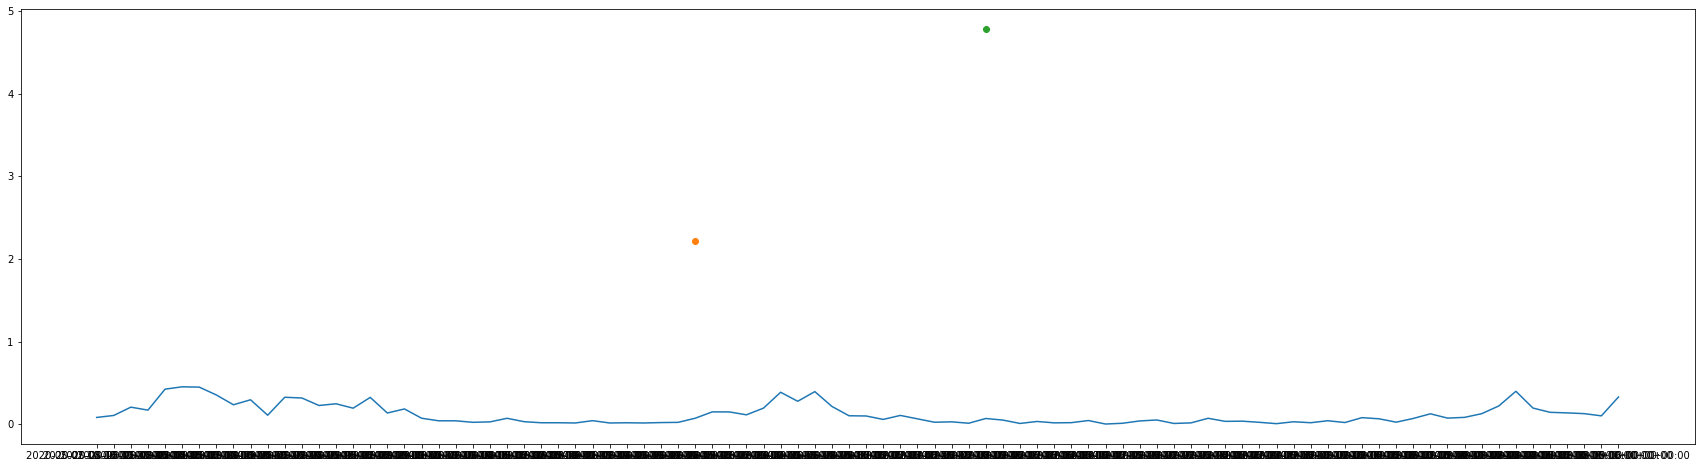

In [88]:
from matplotlib.pyplot import figure
dates = np.array(d2["Date"].tolist())
returns = np.array(d2["% Rank of DF Avgs"].tolist())
figure(figsize=(30, 8))
plt.plot(dates, returns)
for i in range(2):
    plt.plot(outliers.iloc[i]["Date"], outliers.iloc[i]["simple_rtn"], marker="o")